In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv('total_rent/real_total_rent.csv')

In [3]:
train_data = train_data.fillna(0)

In [4]:
train_data.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,1,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,1,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,1,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,1,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,1,3,-9.1,0.0,0.6,92.0,8.8,0.0


## train data

In [5]:
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')
train_data.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,1,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,1,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,1,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,1,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,1,3,-9.1,0.0,0.6,92.0,8.8,0.0


In [6]:
del train_data['STATION']
del train_data['YEAR']
del train_data['DAY']

In [7]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
y_train += np.ones(len(y_train)) # to avoid divide_by_0

## test data

In [8]:
test_data = pd.read_csv('total_rent/real_total_rent.csv')

In [9]:
test_data = test_data.fillna(0)

In [10]:
# 2015년 1월 1일 3번 STATION들만 남겨주는 작업
test_data = test_data[test_data['YEAR'].isin([2015])]
test_data = test_data[test_data['MONTH'].isin([1])]
test_data = test_data[test_data['DAY'].isin([1])]
test_data = test_data[test_data['STATION'].isin([3])]

In [11]:
test_data['MONTH'] = test_data['MONTH'].astype('object')
test_data['HOUR'] = test_data['HOUR'].astype('object')
test_data['WEEKDAY'] = test_data['WEEKDAY'].astype('object')
test_data['SEASON'] = test_data['SEASON'].astype('object')

In [12]:
del test_data['STATION']
del test_data['YEAR']
del test_data['DAY']

In [13]:
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
y_test += np.ones(len(y_test))

## train data에 대해 random-forest

In [14]:
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
importances = list(rf.feature_importances_)

## 영향도 계산

In [16]:
importances

[0.02737638078897088,
 0.4881611011181022,
 0.036070531005700374,
 0.006744704628981786,
 0.26115228086674297,
 0.04826538830424304,
 0.04007293403031754,
 0.08831941346295363,
 0.0038372657939874755]

In [17]:
#소수점 2째 자리까지 반올림

for i in range(len(importances)):
    importances[i] = round(importances[i],2)

In [18]:
importances

[0.03, 0.49, 0.04, 0.01, 0.26, 0.05, 0.04, 0.09, 0.0]

In [19]:
# y(RENTCOUNT 제거)
del train_data['RENTCOUNT']

## 2-a. 예측 영향도 그래프

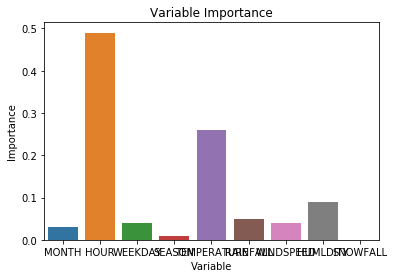

In [20]:
ax = sns.barplot(x=train_data.columns, y = importances)
ax.set(xlabel = 'Variable', ylabel = 'Importance')
plt.title('Variable Importance')
plt.show()

## 2-b. 하루 시간별 대여량 예측 모델

In [21]:
predictions = rf.predict(X_test)

In [24]:
predictions

array([1.02265539, 1.        , 1.        , 1.        , 1.        ,
       1.00732709, 1.01580175, 1.1049257 , 1.58127352, 1.51306995,
       1.61176344, 1.3294487 , 1.13417484, 1.33874833, 1.30664374,
       1.23543655, 1.2521806 , 1.20539681, 1.13797875, 1.17582379,
       1.26463636, 1.32194678, 1.34740638, 1.32244084])

In [22]:
errors = np.sqrt(np.mean((predictions-y_test)**2))

In [23]:
print('Error: ', round(errors,2), 'degrees.')

Error:  1.46 degrees.


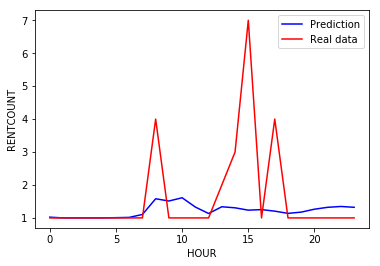

In [31]:
x = range(24)
predict = predictions

plt.plot(x,predict,color = 'blue', label = 'Prediction')
plt.plot(x, y_test, color ='red', label = 'Real data')
plt.legend()
plt.xlabel('HOUR')
plt.ylabel('RENTCOUNT')
plt.show()